In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

## DATA PREPROCESSING

In [2]:
reviews = pd.read_json('../data/IMDB_reviews.json', lines=True)
movies = pd.read_json('../data/IMDB_movie_details.json', lines=True)

In [3]:
reviews.head()

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary
0,10 February 2006,tt0111161,ur1898687,True,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.
1,6 September 2000,tt0111161,ur0842118,True,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.
2,3 August 2001,tt0111161,ur1285640,True,I believe that this film is the best story eve...,8,The best story ever told on film
3,1 September 2002,tt0111161,ur1003471,True,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?
4,20 May 2004,tt0111161,ur0226855,True,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted"


In [4]:
def replace_string_binary(x):
    if x:
        return 1
    return 0

reviews['is_spoiler'] = reviews['is_spoiler'].apply(lambda x: replace_string_binary(x))
reviews

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary
0,10 February 2006,tt0111161,ur1898687,1,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.
1,6 September 2000,tt0111161,ur0842118,1,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.
2,3 August 2001,tt0111161,ur1285640,1,I believe that this film is the best story eve...,8,The best story ever told on film
3,1 September 2002,tt0111161,ur1003471,1,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?
4,20 May 2004,tt0111161,ur0226855,1,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted"
...,...,...,...,...,...,...,...
573908,8 August 1999,tt0139239,ur0100166,0,"Go is wise, fast and pure entertainment. Assem...",10,The best teen movie of the nineties
573909,31 July 1999,tt0139239,ur0021767,0,"Well, what shall I say. this one´s fun at any ...",9,Go - see the movie
573910,20 July 1999,tt0139239,ur0392750,0,"Go is the best movie I have ever seen, and I'v...",10,It's the best movie I've ever seen
573911,11 June 1999,tt0139239,ur0349105,0,Call this 1999 teenage version of Pulp Fiction...,3,Haven't we seen this before?


In [5]:
from nltk import download       
from nltk.corpus import stopwords

download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /Users/ilyas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
def remove_stop_words(x):
    l = x.split(' ')
    l = [word for word in l if not word.lower() in stop_words]
    return ' '.join(l)

reviews['review_text'] = reviews['review_text'].apply(lambda x: remove_stop_words(x))

In [7]:
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

def evaluate(classes, y_pred, y_test):
    print("Classification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred, labels=classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=classes)
    disp.plot()
    plt.show()

## VECTORIZATION

In [8]:
import gensim.downloader as api
wv = api.load("glove-twitter-100")
wv["dies"]

[==================================================] 100.0% 387.1/387.1MB downloaded


array([ 0.32059  , -0.21596  , -0.093307 , -0.23508  , -0.21944  ,
       -0.43861  , -0.24549  ,  0.27355  ,  0.31843  , -0.38151  ,
        0.30515  ,  0.73405  , -3.0547   , -0.18363  ,  0.32768  ,
        0.24458  ,  0.50974  ,  0.43887  , -0.53148  ,  1.0048   ,
        0.25003  , -0.40452  , -0.22272  , -0.61406  ,  0.17066  ,
       -0.077419 , -0.47784  , -0.71765  ,  0.18994  ,  0.66271  ,
        0.74501  , -0.5795   ,  0.42334  , -0.049017 ,  0.012426 ,
        0.4791   , -0.10987  ,  0.0066187,  0.4205   , -0.36278  ,
       -0.17012  ,  0.3764   , -1.2626   ,  0.040535 ,  0.089243 ,
        0.47583  ,  1.0399   ,  0.099011 , -0.47792  ,  0.4592   ,
        0.16048  ,  0.23785  ,  0.17675  ,  0.44039  , -0.28844  ,
       -0.24879  , -0.28712  ,  0.87424  ,  0.16182  ,  0.22224  ,
       -0.55222  ,  0.36846  ,  0.5984   , -0.53348  ,  0.64394  ,
       -1.0239   ,  0.49401  ,  1.0797   ,  0.15894  ,  0.21527  ,
        0.54706  , -0.60231  ,  1.0004   , -0.47396  ,  0.7621

In [9]:
def vectorize(review, word2vec):
    words = review.split()
    words = np.array([word for word in words if word in word2vec])
       # Check if there are any valid words
    if words.size > 0:
        res = np.mean(word2vec[words], axis=0)
    else:
        res = np.zeros(word2vec.vector_size)

    return res

In [10]:
reviews_list = reviews['review_text'].tolist()
review_vectors = []
for review in reviews_list:
    res = vectorize(review, wv)
    review_vectors.append(res)

In [13]:
y = reviews['is_spoiler'].tolist()

In [15]:
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import TensorDataset, DataLoader

In [16]:
reviews_tensor = torch.tensor(review_vectors, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.int16)


X_train, X_test, y_train, y_test = train_test_split(reviews_tensor, y, test_size=0.2, random_state=42)

train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
test_dataset = torch.utils.data.TensorDataset(X_test, y_test)

batch_size = 64
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

/var/folders/0c/r221n06s23g6gp_ydkg17qcw0000gn/T/ipykernel_92261/1940733032.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.int16)


## FFN

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import precision_score, recall_score, f1_score
import torch.nn.functional as F


class FeedForwardNN(nn.Module):
    def __init__(self, vocab_size, hidden_dim, num_classes):
        super(FeedForwardNN, self).__init__()
        self.fc1 = nn.Linear(vocab_size, hidden_dim*2)
        self.dropout1 = nn.Dropout(p=0.1)
        self.fc2 = nn.Linear(hidden_dim*2, hidden_dim)
        self.dropout2 = nn.Dropout(p=0.1)
        self.fc3 = nn.Linear(hidden_dim, num_classes)
    
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        return self.fc3(x)

In [31]:
num_epochs = 20
vocab_size = wv.vector_size
num_classes = 2

model = FeedForwardNN(vocab_size, 10, num_classes)
print(model)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(model.parameters(), lr=0.1)
optimizer = optim.Adam(model.parameters(), lr=0.005)
#optimizer = optim.AdamW(model.parameters(), lr=0.005)

for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        inputs = inputs.float()
        labels = labels.long()
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        #nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

    model.eval()
    correct = 0
    total = 0
    all_labels = []
    all_predictions = []
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            all_labels.extend(labels)
            all_predictions.extend(predicted)

    precision = precision_score(all_labels, all_predictions, average='weighted', zero_division=0)
    recall = recall_score(all_labels, all_predictions, average='weighted')
    f1 = f1_score(all_labels, all_predictions, average='weighted')
    
    print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')

FeedForwardNN(
  (fc1): Linear(in_features=100, out_features=20, bias=True)
  (dropout1): Dropout(p=0.1, inplace=False)
  (fc2): Linear(in_features=20, out_features=10, bias=True)
  (dropout2): Dropout(p=0.1, inplace=False)
  (fc3): Linear(in_features=10, out_features=2, bias=True)
)
Epoch [1/20], Loss: 0.4698


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x104924ed0>>
Traceback (most recent call last):
  File "/Users/ilyas/miniconda3/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 770, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


Precision: 0.7103, Recall: 0.7471, F1 Score: 0.6814
Epoch [2/20], Loss: 0.6251
Precision: 0.7149, Recall: 0.7496, F1 Score: 0.6908
Epoch [3/20], Loss: 0.4459
Precision: 0.7142, Recall: 0.7492, F1 Score: 0.6896
Epoch [4/20], Loss: 0.4601


KeyboardInterrupt: 

In [22]:
spoiler = 'Lyes dies at the end of the movie'
res = vectorize(spoiler, wv)
res_tensor = torch.tensor(res, dtype=torch.float32)
model.eval()
output = model(res_tensor)
_, predicted = torch.max(output.data, 0)
predicted

tensor(0)

In [23]:
y_pred = []
y_true = []
for data, labels in test_loader:
    y_true.extend(labels.tolist())
    outputs = model(data)
    _, predicted = torch.max(outputs.data, 1)
    y_pred.extend(predicted.tolist())

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.96      0.85     84742
           1       0.59      0.18      0.28     30041

    accuracy                           0.75    114783
   macro avg       0.68      0.57      0.57    114783
weighted avg       0.72      0.75      0.70    114783



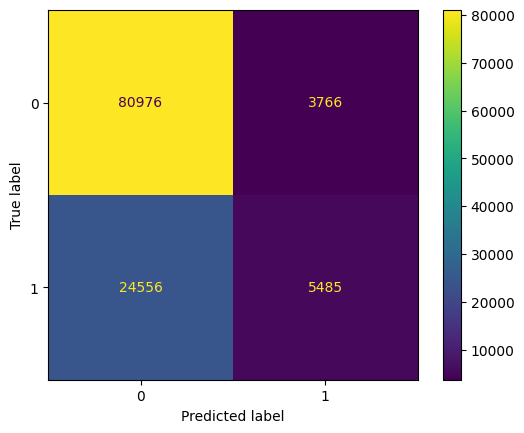

In [24]:
evaluate([0, 1], y_pred, y_true)

In [27]:
wv.most_similar('hate', topn=10)

[('people', 0.8379713296890259),
 ("n't", 0.8350358605384827),
 ('stupid', 0.8335314393043518),
 ('why', 0.8262855410575867),
 ('fuck', 0.8216034770011902),
 ('swear', 0.8184736967086792),
 ('really', 0.8134284019470215),
 ('seriously', 0.8107861876487732),
 ('when', 0.8097612261772156),
 ('because', 0.8096842765808105)]